In [1]:
import pandas as pd
import numpy as np
import os

data_path = '../Data/'
train_data_path = os.path.join(data_path, 'train_data.csv')
print('[+] train_data_path: {}'.format(train_data_path))

train_data = pd.read_csv(train_data_path)
print('[+] train_data shape: {}'.format(train_data.shape))
print('[+] train_data columns type')

train_data.dtypes

[+] train_data_path: ../Data/train_data.csv
[+] train_data shape: (113, 22)
[+] train_data columns type


name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

In [2]:
# 檢視資料中[類別型欄位]各自類別的數量
print('[+] train_data object column each num \n{}'.format(train_data.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis=0)))

[+] train_data object column each num 
name             113
email_address     83
dtype: int64


In [3]:
train_data[['name', 'email_address', 'poi']].head()

,name,email_address,poi
0,RICE KENNETH D,ken.rice@enron.com,True
1,SKILLING JEFFREY K,jeff.skilling@enron.com,True
2,SHELBY REX,rex.shelby@enron.com,True
3,KOPPER MICHAEL J,michael.kopper@enron.com,True
4,CALGER CHRISTOPHER F,christopher.calger@enron.com,True


In [4]:
from sklearn.preprocessing import LabelEncoder

# Label encoding 的表示方式會讓同一個欄位底下的類別之間有大小關係 (0<1<2<...)，所以在這裡我們只對有類別數量小於等於 2 的類別型欄位
# 會比較洽當。。
le = LabelEncoder()
for col in train_data:
    if train_data[col].dtype != 'float64':
        if len(list(train_data[col].unique())) <= 2:
            # Train on the training data && 缺失處理
            train_data[col] = train_data[col].fillna('NaN')
            le.fit(train_data[col])
            train_data[col] = le.transform(train_data[col])
train_data[['name', 'email_address', 'poi']].head()

,name,email_address,poi
0,RICE KENNETH D,ken.rice@enron.com,1
1,SKILLING JEFFREY K,jeff.skilling@enron.com,1
2,SHELBY REX,rex.shelby@enron.com,1
3,KOPPER MICHAEL J,michael.kopper@enron.com,1
4,CALGER CHRISTOPHER F,christopher.calger@enron.com,1


In [40]:
# one hot encoding，姓名和EMAIL差異過大，one hot encoding、Lable encoding不覺得洽當
# train_data = pd.get_dummies(train_data)
# train_data.dtypes
# train_data.shape

(113, 216)

In [5]:
train_data = pd.read_csv(train_data_path)

# df.dtypes : 轉成以欄位為 index, 類別(type)為 value 的 DataFrame
# reset_index() : 預設是將原本的 index 轉成一個新的欄位, 如果不須保留 index, 則通常會寫成 .reset_index(drop=True)
column_train_data = train_data.dtypes.reset_index()
print('[+] column_train_data shape: {}'.format(column_train_data.shape))
column_train_data.columns = ["Count", "Column Type"]
print(column_train_data)

# 秀出資料欄位的類型, 與對應的數量
column_train_data = column_train_data.groupby('Column Type').aggregate('count').reset_index()
print('[+] column_train_data shape: {}'.format(column_train_data.shape))
column_train_data

[+] column_train_data shape: (22, 2)
                        Count Column Type
0                        name      object
1                       bonus     float64
2           deferral_payments     float64
3             deferred_income     float64
4               director_fees     float64
5               email_address      object
6     exercised_stock_options     float64
7                    expenses     float64
8               from_messages     float64
9     from_poi_to_this_person     float64
10    from_this_person_to_poi     float64
11              loan_advances     float64
12        long_term_incentive     float64
13                      other     float64
14                        poi        bool
15           restricted_stock     float64
16  restricted_stock_deferred     float64
17                     salary     float64
18    shared_receipt_with_poi     float64
19                to_messages     float64
20             total_payments     float64
21          total_stock_value     float

,Column Type,Count
0,bool,1
1,float64,19
2,object,2


In [7]:
bool_features = []
float64_features = []
object_features = []

for col_type, col_name in zip(train_data.dtypes, train_data.columns):
#     print('[+] column name: {} type: {} '.format(col_name, col_type))
    if col_type == 'object':
        object_features.append(col_name)
    elif col_type == 'bool':
        bool_features.append(col_name)
    else:
        float64_features.append(col_name)

print('[+] bool_features: {}'.format(bool_features))
print('[+] float64_features: {}'.format(float64_features))
print('[+] object_features: {}'.format(object_features))

[+] bool_features: ['poi']
[+] float64_features: ['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']
[+] object_features: ['name', 'email_address']


In [8]:
train_data[object_features].head()

,name,email_address
0,RICE KENNETH D,ken.rice@enron.com
1,SKILLING JEFFREY K,jeff.skilling@enron.com
2,SHELBY REX,rex.shelby@enron.com
3,KOPPER MICHAEL J,michael.kopper@enron.com
4,CALGER CHRISTOPHER F,christopher.calger@enron.com


In [14]:
train_data['bonus'].describe()

count    6.100000e+01
mean     1.147436e+06
std      1.505189e+06
min      7.000000e+04
25%      4.500000e+05
50%      7.500000e+05
75%      1.000000e+06
max      8.000000e+06
Name: bonus, dtype: float64

[+] bonus values count: 
700000.0     5
600000.0     5
1000000.0    4
750000.0     4
850000.0     3
400000.0     3
500000.0     2
250000.0     2
900000.0     2
800000.0     2
300000.0     2
1200000.0    2
350000.0     2
200000.0     2
325000.0     2
1100000.0    2
70000.0      1
7000000.0    1
788750.0     1
1300000.0    1
450000.0     1
1150000.0    1
2000000.0    1
3100000.0    1
650000.0     1
1250000.0    1
3000000.0    1
8000000.0    1
100000.0     1
5600000.0    1
1750000.0    1
509870.0     1
4175000.0    1
Name: bonus, dtype: int64


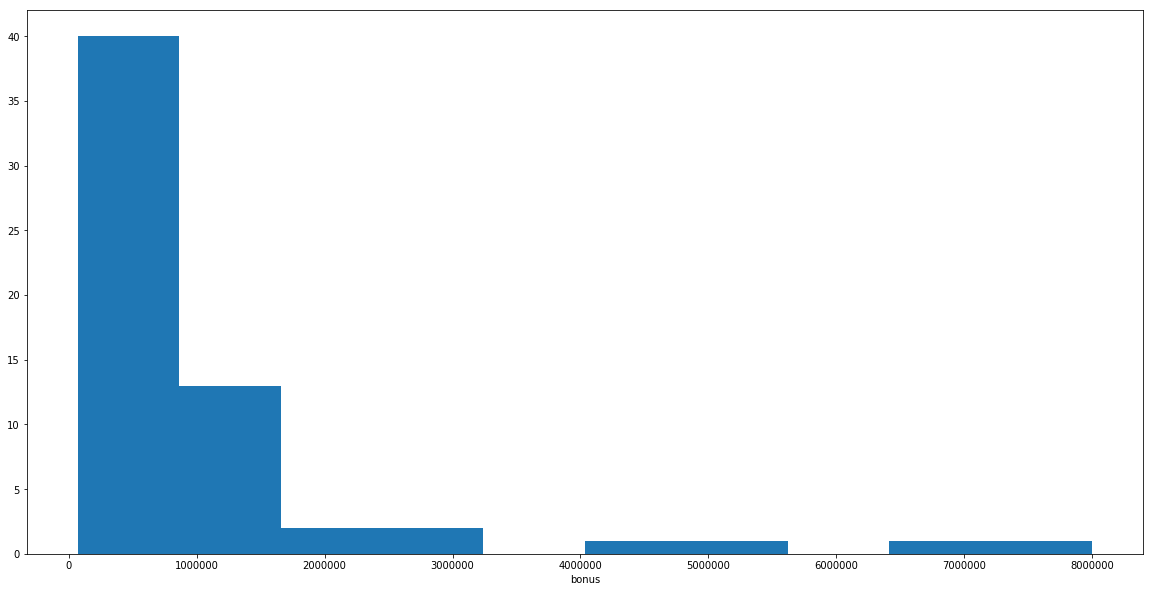

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 10))
# train_data['bonus'].hist()
plt.hist(train_data['bonus'])
plt.xlabel('bonus')
print('[+] bonus values count: \n{}'.format(train_data['bonus'].value_counts()))

In [41]:
import numpy as np
train_data = pd.read_csv(train_data_path)

# 篩選數值型的欄位
# isin()接受一個列表，判斷該列中元素是否在列表中。
# num_df = train_data.dtypes.isin([np.int64, np.float64])
# print('[+] num_df type: {}'.format(type(num_df))) ----> pandas.core.series.Series

numeric_columns = list(train_data.columns[train_data.dtypes.isin([np.int64, np.float64])])
numeric_columns

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

In [45]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(train_data[numeric_columns].columns[train_data[numeric_columns].apply(lambda x:len(x.unique())!=2)])
numeric_columns

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

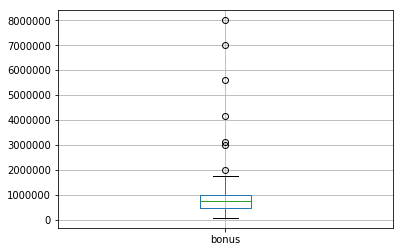

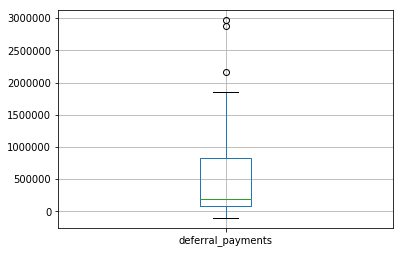

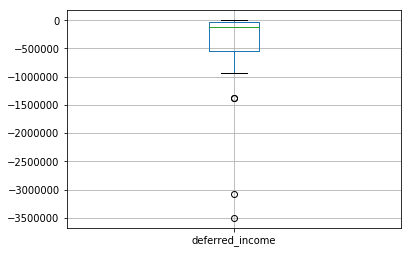

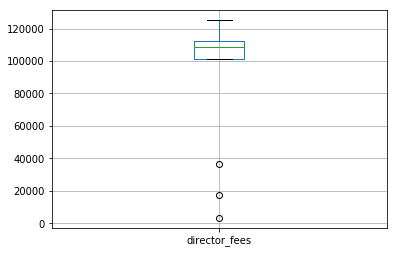

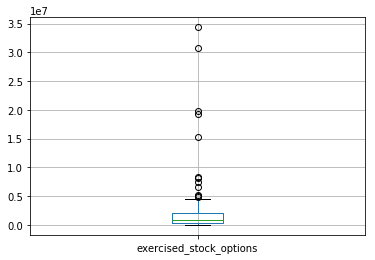

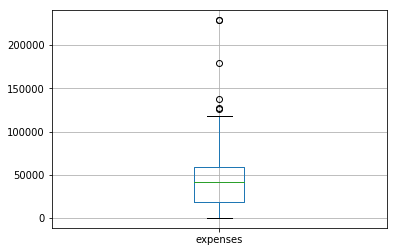

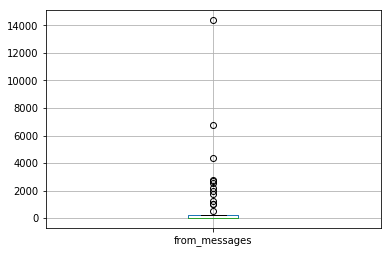

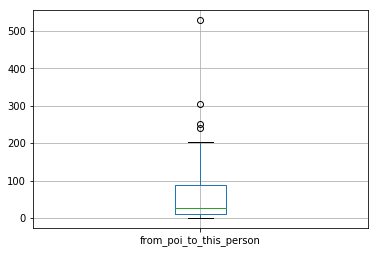

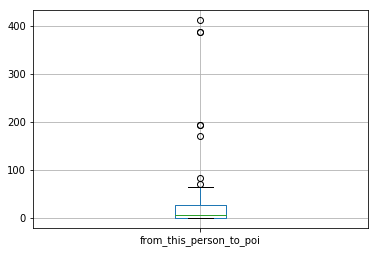

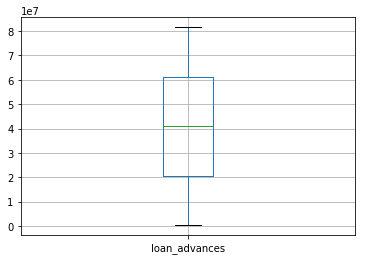

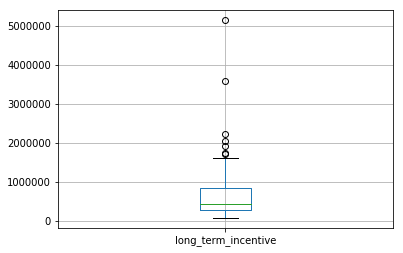

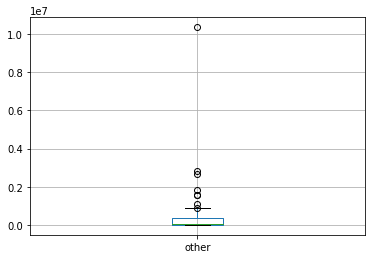

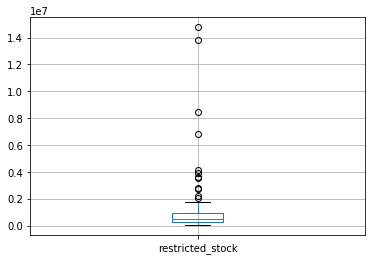

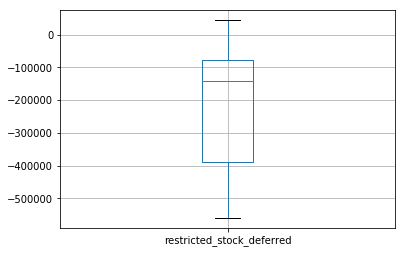

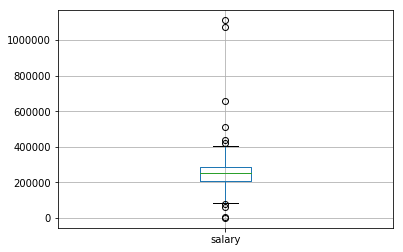

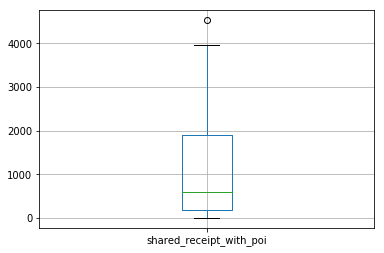

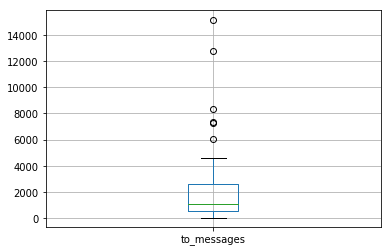

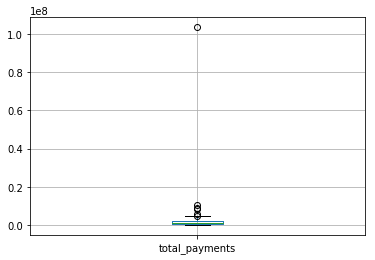

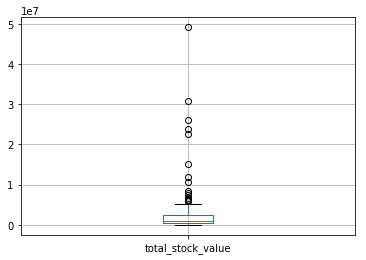

In [46]:
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    train_data.boxplot(col)
    plt.show()